In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.cluster import KMeans
import OptimalK

In [38]:
def GetCategoriesSum(df, category_name: str):
    category = dict()

    for entry in df[category_name]:
        if pd.isnull(entry):
            continue  

        items = entry.split(',')
        for item in items:
            item = item.strip() 
            if item:  
                if item in category:
                    category[item] += 1
                else:
                    category[item] = 1
                    
    return category


def EmbedFrame(df, category_name: str, model: SentenceTransformer):
    embeddings = model.encode(df[category_name].tolist())
    embeddings = model.encode(df[category_name].tolist())
    embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True) # Normalize Vectors
    return embeddings


def CreateCluster(embeddings, num_clusters):
    clustering_model = KMeans(n_clusters=num_clusters)
    clustering_model.fit(embeddings)
    cluster_assignments = clustering_model.labels_
    cluster = {}
    for sentence_id, cluster_id in enumerate(cluster_assignments):
        if cluster_id not in cluster:
            cluster[cluster_id] = []
        cluster[cluster_id].append(df["MDS"][sentence_id])
    return cluster


def PrintCluster(cluster):
    for cluster_id, mds_list in cluster.items():
        print(f"\nCluster {cluster_id}:")
        print("-" * 20)
        for mds in mds_list:
            print(f"- {mds}")



In [39]:
path = 'data/data.csv'
df = pd.read_csv(path, encoding='ISO-8859-1') # Using a different encoding while info is fixed

In [40]:
df = df.dropna(subset=["Authors"]).reset_index(drop=True)

In [41]:
df['Year'].value_counts()

Year
2023.0    36
2024.0    34
2022.0    31
2021.0    29
2020.0    26
2019.0    17
2018.0    17
2017.0     9
2016.0     8
2012.0     6
2015.0     5
2014.0     2
2003.0     2
2010.0     1
2013.0     1
2011.0     1
Name: count, dtype: int64

In [42]:
df['Year'].max()

np.float64(2024.0)

In [43]:
type(df['Country'].value_counts())

pandas.core.series.Series

In [44]:
# Converting Year to int. Filling NaN with 0
df['Year'] = df['Year'].fillna(0).astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Authors                225 non-null    object
 1   Year                   225 non-null    int64 
 2   Paper                  225 non-null    object
 3   Country                225 non-null    object
 4   MDS                    225 non-null    object
 5   Data Source Primary    8 non-null      object
 6   Data Source Secondary  225 non-null    object
 7   Algorithm              225 non-null    object
 8   Task                   192 non-null    object
 9   Cross Validation       174 non-null    object
 10  Performance Metric     222 non-null    object
 11  Sample Size            218 non-null    object
 12  Dataset                210 non-null    object
 13  Goal                   224 non-null    object
 14  Abstract               223 non-null    object
 15  Person                 

In [46]:
# df[df['Country'] == 'US, Canada, UK']

In [47]:
df['Year'].max()

np.int64(2024)

In [48]:
#country_counts

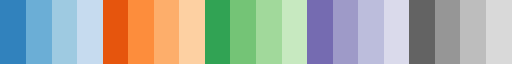

In [49]:
cm.tab20c

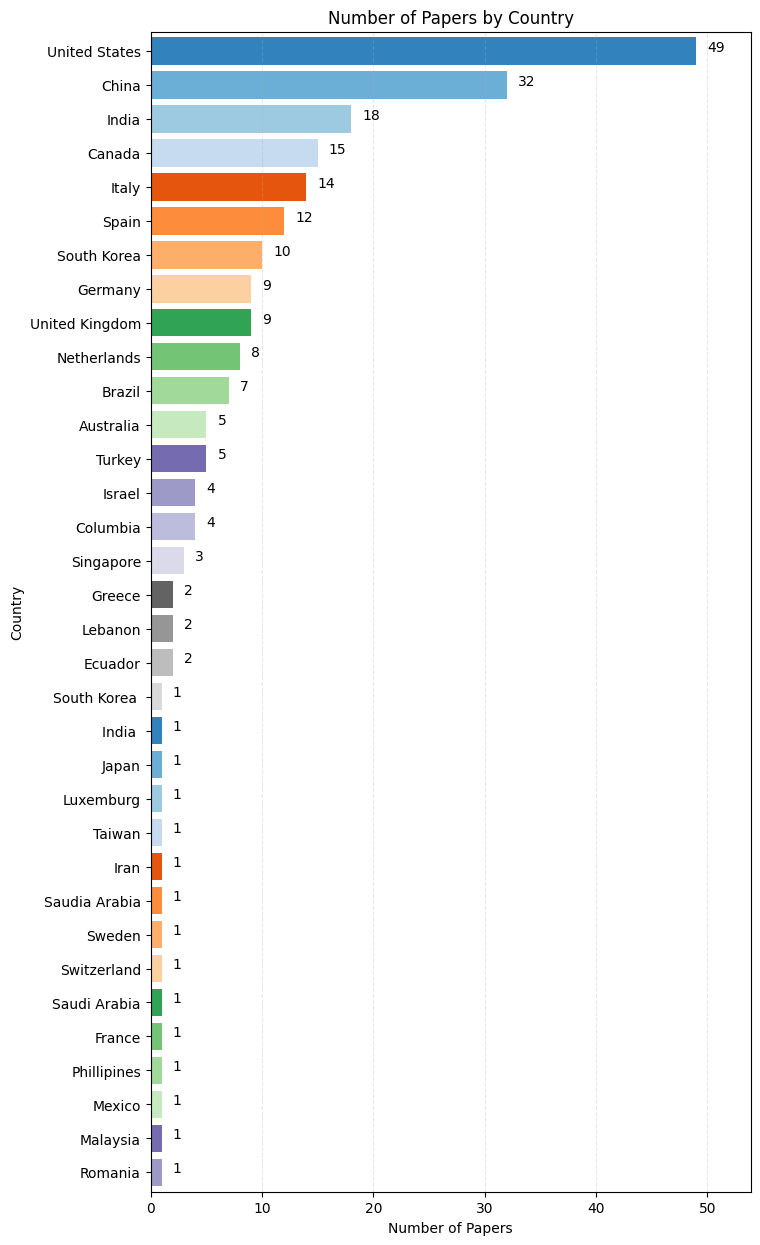

In [50]:
# Plot the horizontal bar graph with spacing between bars
country_counts = df['Country'].value_counts()

plt.figure(figsize=(10, 8))
plt.barh(country_counts.index, country_counts.values, color=cm.tab20c.colors[:len(country_counts)])
# Set the x-axis label
max_count = country_counts.max()
plt.xlim(0, max_count + max_count * 0.1)
plt.margins(y=0.005)
# Labels and title with padding
plt.xlabel('Number of Papers')
plt.ylabel('Country')
plt.title('Number of Papers by Country')

for i, v in enumerate(country_counts.values):
        plt.text(v + 1, i, str(v))

# Increase spacing between plot elements if needed
plt.subplots_adjust(left=0.3, right=0.9, top=1.5, bottom=0.05)
plt.grid(axis='x', linestyle='--', alpha=0.3)
# Optional: invert y-axis for descending order
plt.gca().invert_yaxis()
plt.show()

In [51]:
df['MDS'].value_counts()

MDS
PD                             47
FoG                            40
TS                             25
Dyskinesia                     23
Bradykinesia                   22
PD                             13
Dystonia                        9
Ataxia                          6
Isolated Dystonia               5
Dyskinesia, PD                  5
Cervical Dystonia               4
Bradykinesia                    4
Ataxia (Multiple Sclerosis)     3
Ataxia (Cerebellar)             3
ET, PD                          2
Ataxia (Friedreich's)           2
Bradykinesia, PD                2
Ataxia (Spinocerebellar)        1
PD                              1
FoG, PD                         1
Dyskinesia, ET, PD              1
Dyskinesia, Tremor              1
Ataxia (Cerebellar), PD         1
Dyskinesia, ET, Tremor          1
Ataxia (Cerebellar)             1
X-linked Dystonia               1
Ataxia, PD                      1
Name: count, dtype: int64

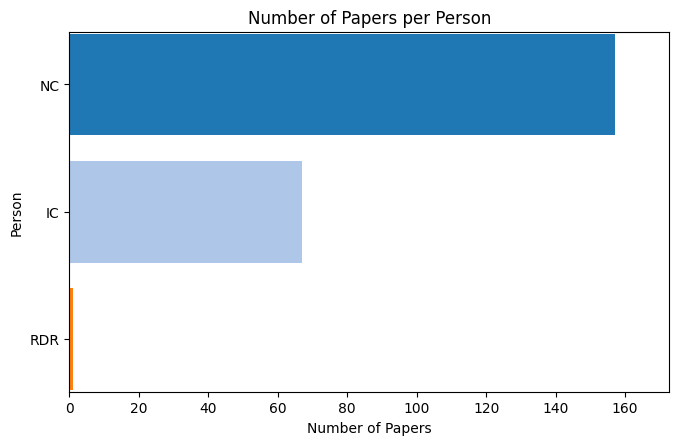

In [52]:
# Plot the horizontal bar graph with spacing between bars
person_counts = df['Person'].value_counts()

plt.figure(figsize=(10, 8))
plt.barh(person_counts.index, person_counts.values, color=cm.tab20.colors[:len(person_counts)])
# Set the x-axis label
max_count = person_counts.max()
plt.xlim(0, max_count + max_count * 0.1)
plt.margins(y=0.005)
# Labels and title with padding
plt.xlabel('Number of Papers')
plt.ylabel('Person')
plt.title('Number of Papers per Person')

# for i, v in enumerate(person_counts.values):
#         plt.text(v + 1, i, str(v))

# Increase spacing between plot elements if needed
plt.subplots_adjust(left=0.3, right=0.9, top=0.5, bottom=0.05)
# plt.grid(axis='x', linestyle='--', alpha=0.3)
# Optional: invert y-axis for descending order
plt.gca().invert_yaxis()
plt.show()

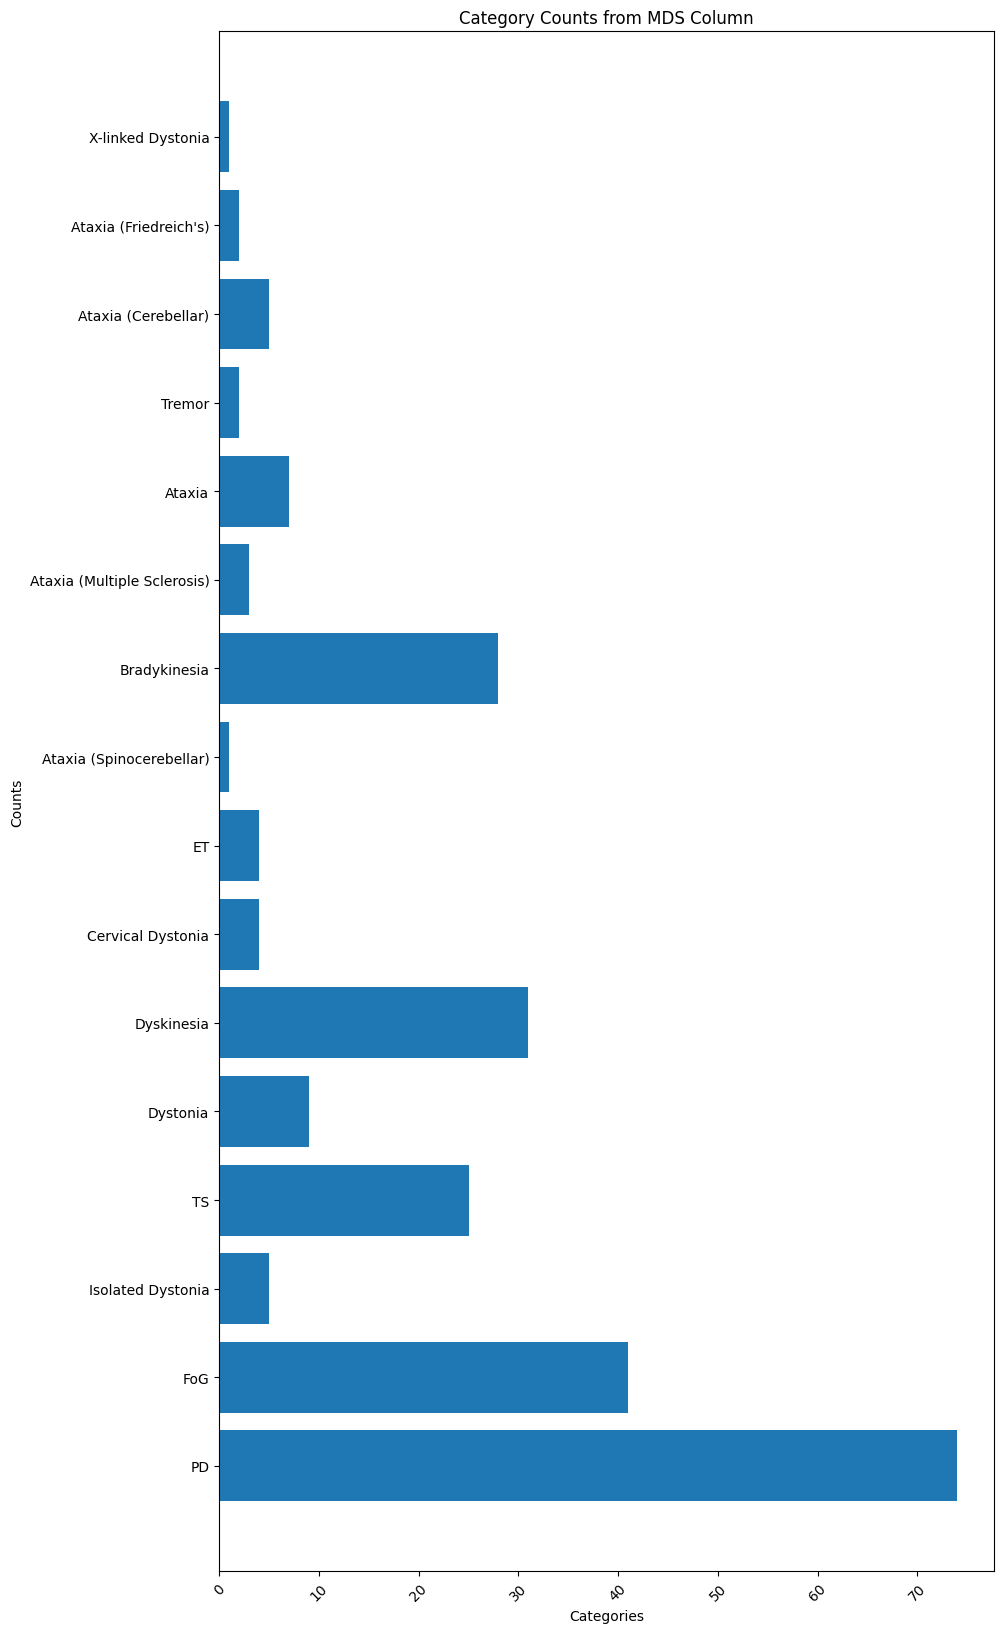

In [53]:
category_counts = GetCategoriesSum(df, "MDS")
category_counts_series = pd.Series(category_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 20))
plt.barh(category_counts_series.index, category_counts_series.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Counts from MDS Column')
plt.xticks(rotation=45)
plt.show()

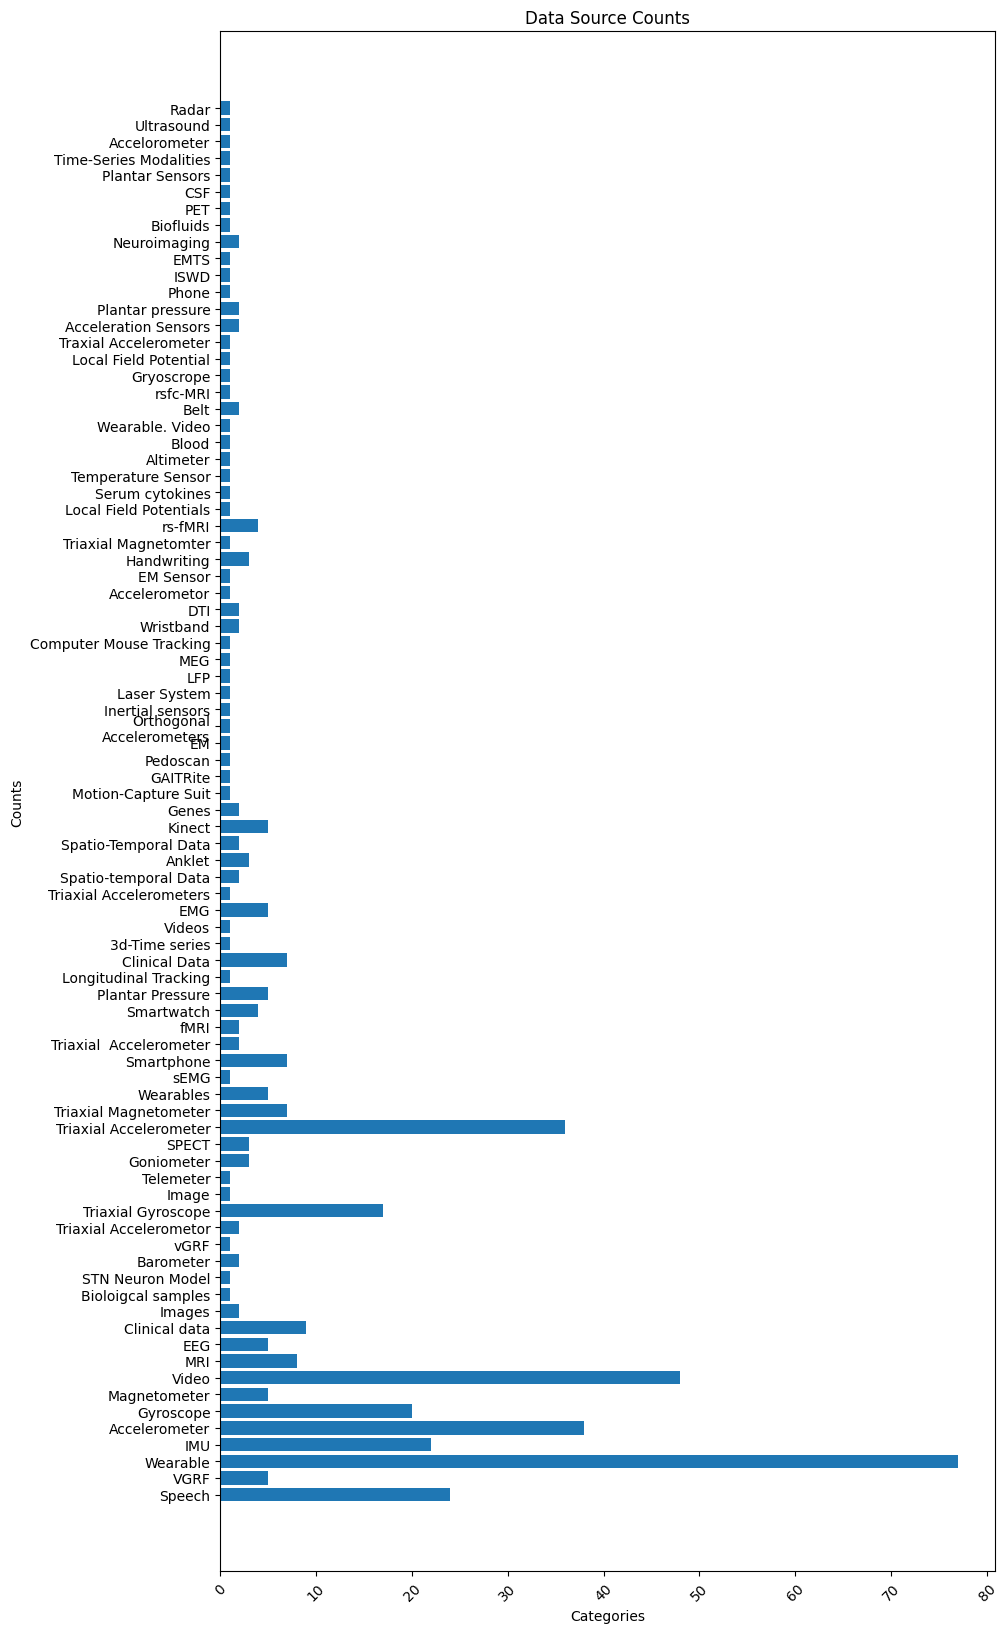

In [54]:
category_counts = GetCategoriesSum(df, "Data Source Secondary")

# Convert dictionary to Series for plotting
category_counts_series = pd.Series(category_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 20))
plt.barh(category_counts_series.index, category_counts_series.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Data Source Counts')
plt.xticks(rotation=45)
plt.show()

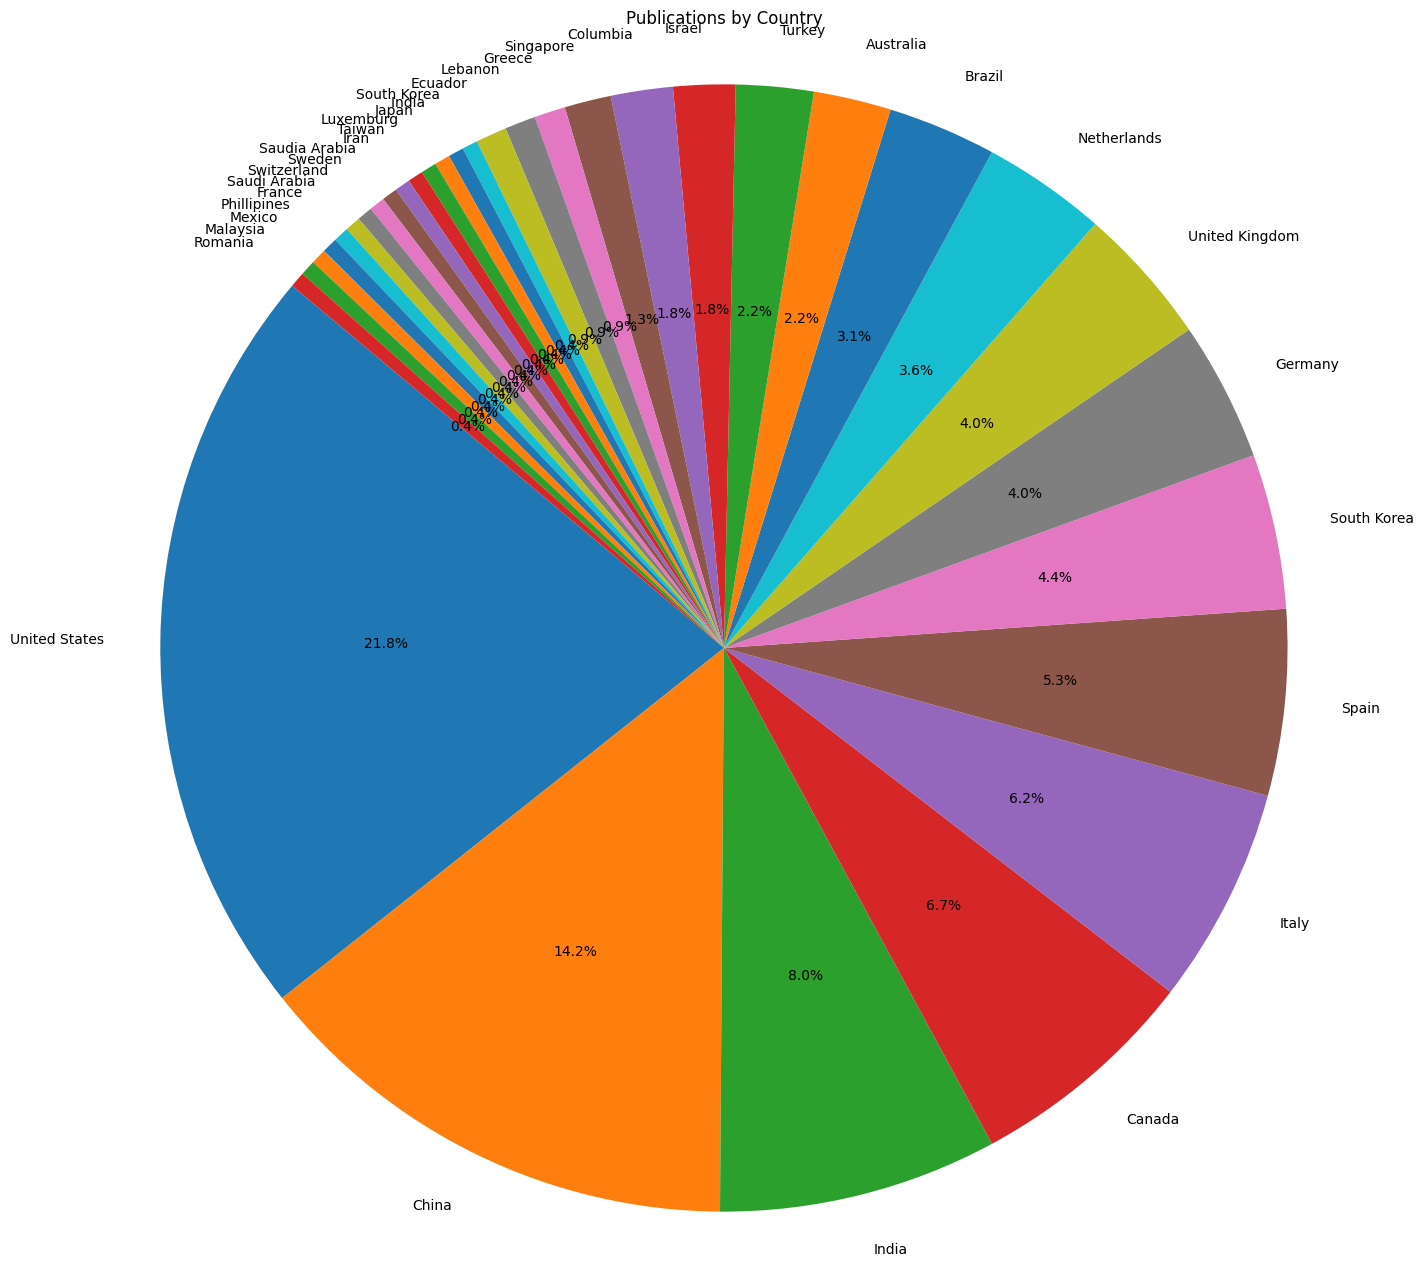

In [55]:
country_counts = df['Country'].value_counts()

# Plot
plt.figure(figsize=(16, 16))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Publications by Country')
plt.axis('equal')
plt.show()

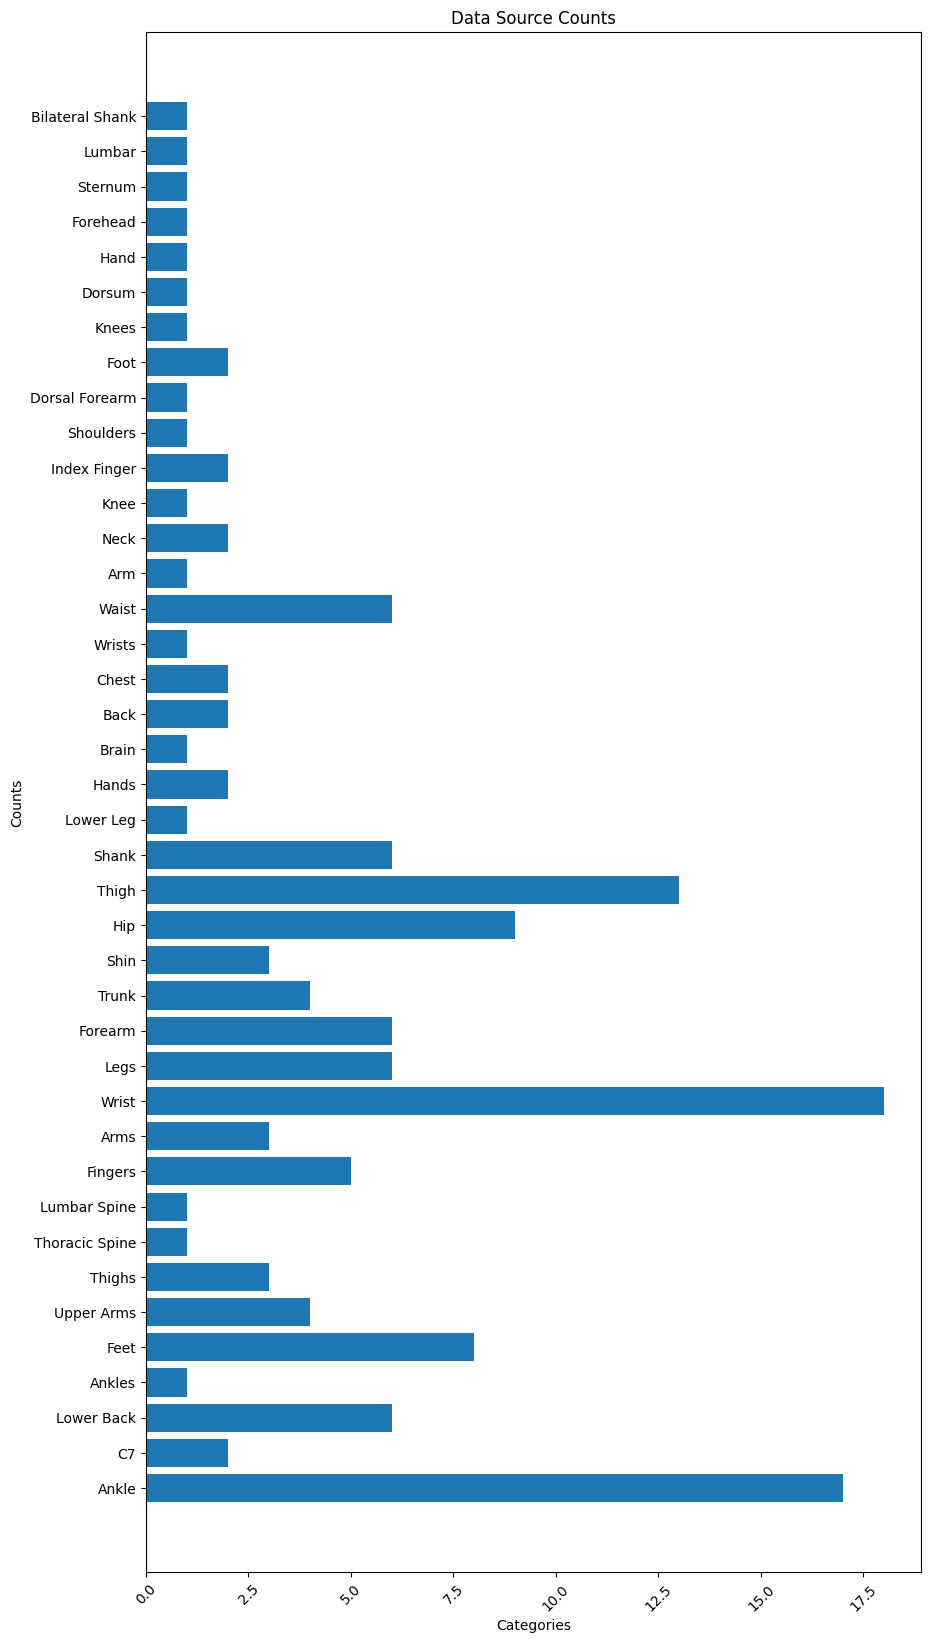

In [56]:
category_counts = GetCategoriesSum(df, "Wearable Location")

# Convert dictionary to Series for plotting
category_counts_series = pd.Series(category_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 20))
plt.barh(category_counts_series.index, category_counts_series.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Data Source Counts')
plt.xticks(rotation=45)
plt.show()

In [57]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [58]:
df["Abstract"] = df["Abstract"].fillna("")
embedded_abstracts = EmbedFrame(df, "Abstract", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_abstracts, n_refs=50, cluster_array=np.arange(1,10))

clustered_abstracts = CreateCluster(embedded_abstracts, num_clusters)
PrintCluster(clustered_abstracts)


Cluster 0:
--------------------
- PD
- PD
- PD
- PD 
- PD
- PD
- TS
- TS
- PD
- Bradykinesia
- Ataxia (Multiple Sclerosis)
- Ataxia
- PD  
- Bradykinesia
- PD 
- Dystonia
- Ataxia (Multiple Sclerosis)

Cluster 4:
--------------------
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG, PD
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG

Cluster 1:
--------------------
- PD 
- PD
- Dyskinesia
- Dyskinesia
- TS
- Dyskinesia, PD
- Dyskinesia
- Dyskinesia
- Dyskinesia
- PD 
- PD 
- Ataxia (Cerebellar)
- Bradykinesia
- Bradykinesia, PD
- PD
- Bradykinesia
- PD 
- Bradykinesia
- PD
- PD 
- PD
- PD 
- PD 
- PD 
- Bradykinesia 
- PD

Cluster 2:
--------------------
- Isolated Dystonia
- Dystonia
- Cervical Dystonia
- Cervical Dystonia
- Cervical Dystonia
- Dystonia
- Isolated Dystonia
- Dystonia
- Dystonia
- Isolated Dystonia
- Isolated Dystonia
- Dystonia
- Dystonia

In [59]:
df["Goal"] = df["Goal"].fillna("")
embedded_goals = EmbedFrame(df, "Goal", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_abstracts, n_refs=50, cluster_array=np.arange(1,10))

clustered_goals = CreateCluster(embedded_goals, num_clusters)
PrintCluster(clustered_goals)


Cluster 1:
--------------------
- PD
- PD
- PD 
- PD
- PD 
- PD
- PD
- PD
- PD
- ET, PD
- PD
- PD
- Ataxia (Spinocerebellar)
- PD
- PD
- Dyskinesia
- PD  
- PD 
- Bradykinesia, PD
- PD
- PD
- Bradykinesia
- PD 
- PD
- FoG
- PD
- PD
- PD
- PD 
- PD 
- Bradykinesia
- PD
- Ataxia
- PD 
- PD
- Dyskinesia, PD
- PD 
- PD 
- PD
- Bradykinesia
- PD 
- PD 
- PD
- ET, PD
- Bradykinesia
- PD
- PD

Cluster 5:
--------------------
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG, PD
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG

Cluster 2:
--------------------
- Isolated Dystonia
- Dystonia
- Dystonia
- Cervical Dystonia
- Isolated Dystonia
- Dystonia
- Dystonia
- Isolated Dystonia
- Isolated Dystonia
- Dystonia
- Isolated Dystonia
- Dystonia
- TS
- Cervical Dystonia

Cluster 6:
--------------------
- TS
- PD
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- 

In [60]:
df["Data Source Secondary"] = df["Data Source Secondary"].fillna("")
embedded_DSS = EmbedFrame(df, "Data Source Secondary", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_DSS, n_refs=50, cluster_array=np.arange(1,10))

clustered_DSS = CreateCluster(embedded_DSS, num_clusters)
PrintCluster(clustered_DSS)


Cluster 2:
--------------------
- PD
- PD
- PD 
- TS
- PD
- Dystonia
- PD
- Cervical Dystonia
- Cervical Dystonia
- Cervical Dystonia
- PD 
- PD
- Dyskinesia
- TS
- Dystonia
- Dyskinesia
- TS
- PD
- PD
- Dyskinesia, PD
- Ataxia
- Dyskinesia
- Dyskinesia
- Dyskinesia
- PD  
- PD 
- TS
- PD
- PD
- PD
- PD
- Ataxia
- Ataxia (Cerebellar)
- Bradykinesia
- Bradykinesia, PD
- PD
- PD
- Bradykinesia
- PD 
- Dystonia
- TS
- PD
- Bradykinesia
- TS
- Bradykinesia
- PD
- PD
- PD
- PD
- PD 
- PD
- Bradykinesia
- TS
- PD
- PD
- PD 
- PD 
- PD
- Dystonia
- TS
- PD
- Bradykinesia
- Bradykinesia 
- Bradykinesia 
- Dyskinesia
- PD
- TS
- PD
- Ataxia

Cluster 6:
--------------------
- FoG
- FoG
- PD
- PD
- FoG
- PD
- Bradykinesia
- TS
- FoG
- FoG
- Dystonia
- Dyskinesia, ET, PD
- Dyskinesia, PD
- Dyskinesia, PD
- FoG
- Dystonia
- Ataxia (Cerebellar)
- Bradykinesia
- Bradykinesia
- Dyskinesia
- FoG
- Bradykinesia
- Dyskinesia
- Dyskinesia
- Dyskinesia, PD
- Dyskinesia
- Bradykinesia
- FoG
- X-linked Dyst

In [61]:
df["Paper"] = df["Paper"].fillna("")
embedded_papers = EmbedFrame(df, "Paper", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_papers, n_refs=50, cluster_array=np.arange(1,10))

clustered_papers = CreateCluster(embedded_papers, num_clusters)
PrintCluster(clustered_papers)


Cluster 1:
--------------------
- PD
- PD
- PD 
- PD
- PD 
- PD
- PD
- PD
- TS
- PD
- PD
- PD
- Bradykinesia
- Ataxia
- PD  
- PD 
- Bradykinesia
- Ataxia
- PD
- PD
- Bradykinesia
- PD 
- Dyskinesia
- Bradykinesia
- Bradykinesia
- PD 
- PD 
- PD 
- PD 
- PD 
- PD

Cluster 2:
--------------------
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG

Cluster 6:
--------------------
- Isolated Dystonia
- Dystonia
- PD
- Isolated Dystonia
- Dystonia
- Dystonia
- Isolated Dystonia
- Isolated Dystonia
- Dystonia
- Dystonia
- Isolated Dystonia
- PD
- PD
- X-linked Dystonia
- Dystonia
- Dyskinesia

Cluster 3:
--------------------
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS
- TS

Cluster 7:
--------------------
- FoG
- FoG
- FoG
- PD
- PD 
- FoG
- FoG
- FoG
- FoG
- PD
- FoG
- Ataxia (Cerebellar), PD
- FoG
- PD 
- FoG
- FoG
- FoG
- FoG
- PD
- PD 
- PD
- FoG
- FoG
- FoG
- PD
- FoG
- F

In [62]:
df["Dataset"] = df["Dataset"].fillna("")
embedded_datasets = EmbedFrame(df, "Dataset", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_datasets, n_refs=50, cluster_array=np.arange(1,10))

clustered_datasets = CreateCluster(embedded_datasets, num_clusters)
PrintCluster(clustered_datasets)


Cluster 1:
--------------------
- PD
- FoG
- PD 
- Isolated Dystonia
- TS
- FoG
- FoG
- FoG
- FoG
- Dystonia
- PD
- Cervical Dystonia
- Cervical Dystonia
- PD
- Dyskinesia
- FoG
- Dystonia
- Dyskinesia
- ET, PD
- PD
- TS
- Ataxia (Spinocerebellar)
- Bradykinesia
- Bradykinesia
- Ataxia (Multiple Sclerosis)
- Ataxia
- Dyskinesia
- Dyskinesia
- Dyskinesia
- Isolated Dystonia
- TS
- TS
- PD 
- Bradykinesia
- Dyskinesia, Tremor
- TS
- Dystonia
- FoG
- FoG
- FoG
- Dystonia
- PD
- Dyskinesia, PD
- Dyskinesia, PD
- FoG
- FoG
- Isolated Dystonia
- Dystonia
- Ataxia (Cerebellar)
- Ataxia
- Ataxia (Cerebellar)
- Bradykinesia
- Bradykinesia, PD
- PD
- Ataxia (Friedreich's)
- Ataxia (Cerebellar), PD
- Bradykinesia
- PD 
- Bradykinesia
- PD
- Dystonia
- Dyskinesia
- TS
- Ataxia (Cerebellar)
- Ataxia (Cerebellar) 
- Bradykinesia
- Bradykinesia
- FoG
- PD 
- Dyskinesia
- TS
- Bradykinesia
- PD
- TS
- Dyskinesia
- Bradykinesia
- Dyskinesia
- PD
- Dyskinesia, PD
- Dyskinesia
- PD 
- PD 
- FoG
- Bradyk

In [63]:
df["Task"] = df["Task"].fillna("")
embedded_tasks = EmbedFrame(df, "Task", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_tasks, n_refs=50, cluster_array=np.arange(1,10))

clustered_tasks = CreateCluster(embedded_tasks, num_clusters)
PrintCluster(clustered_tasks)


Cluster 5:
--------------------
- PD
- Dyskinesia
- Dyskinesia
- PD 
- PD
- PD
- PD
- PD 
- Dyskinesia
- TS
- PD
- PD
- Dyskinesia

Cluster 4:
--------------------
- PD
- PD
- PD
- PD
- PD
- PD
- ET, PD
- PD
- Bradykinesia
- PD
- PD
- FoG, PD
- Dystonia
- Ataxia (Cerebellar)
- Ataxia
- Ataxia (Cerebellar)
- PD
- PD
- Dyskinesia
- Ataxia (Cerebellar)
- Bradykinesia
- Bradykinesia
- PD
- Bradykinesia, PD
- Dyskinesia, PD
- PD 
- Ataxia (Friedreich's)
- Dyskinesia
- Dyskinesia
- Bradykinesia
- PD
- Ataxia (Multiple Sclerosis)
- ET, PD
- PD
- Ataxia, PD
- Bradykinesia
- PD
- Ataxia
- PD
- Ataxia

Cluster 8:
--------------------
- FoG
- PD
- FoG
- PD
- FoG

Cluster 2:
--------------------
- PD 
- Isolated Dystonia
- Dystonia
- PD
- TS
- Isolated Dystonia
- Dystonia
- TS
- Isolated Dystonia
- Isolated Dystonia
- PD
- FoG
- Dyskinesia, ET, Tremor
- Isolated Dystonia
- FoG
- TS
- TS
- FoG
- Dystonia
- TS
- TS
- Dyskinesia
- TS
- PD
- FoG
- PD
- TS
- PD
- TS
- TS
- TS
- TS
- Ataxia (Multiple S

In [64]:
df["Wearable Location"] = df["Wearable Location"].fillna("")
embedded_wearable_loc = EmbedFrame(df, "Wearable Location", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_wearable_loc, n_refs=50, cluster_array=np.arange(1,10))

clustered_wearable_loc = CreateCluster(embedded_wearable_loc, num_clusters)
PrintCluster(clustered_wearable_loc)


Cluster 0:
--------------------
- PD
- PD
- PD 
- Isolated Dystonia
- TS
- FoG
- Dystonia
- Dyskinesia
- Dyskinesia
- PD
- PD
- Dystonia
- PD
- Cervical Dystonia
- Cervical Dystonia
- Cervical Dystonia
- PD 
- PD
- PD
- Dyskinesia
- TS
- FoG
- PD
- Dystonia
- Dyskinesia
- TS
- PD
- TS
- PD
- Ataxia (Spinocerebellar)
- PD
- FoG
- Dyskinesia, PD
- Ataxia (Multiple Sclerosis)
- Ataxia
- PD
- FoG
- Dyskinesia
- Dyskinesia
- Dyskinesia
- Isolated Dystonia
- PD  
- PD 
- TS
- PD 
- Bradykinesia
- Dystonia
- PD
- PD
- PD
- PD
- TS
- FoG, PD
- Isolated Dystonia
- Isolated Dystonia
- PD
- Ataxia
- Dystonia
- Ataxia (Cerebellar)
- Ataxia
- Bradykinesia, PD
- PD
- PD
- PD
- Ataxia (Friedreich's)
- Ataxia (Cerebellar), PD
- PD
- Bradykinesia
- PD 
- FoG
- Bradykinesia
- PD
- PD
- Dystonia
- Dyskinesia, ET, Tremor
- Isolated Dystonia
- TS
- PD
- Bradykinesia
- FoG
- PD 
- TS
- Bradykinesia
- PD
- TS
- Bradykinesia
- TS
- PD
- PD
- PD 
- PD
- PD 
- Bradykinesia
- TS
- PD
- PD
- PD
- TS
- Ataxia
- P

In [65]:
df["Authors"] = df["Authors"].fillna("")
embedded_authors = EmbedFrame(df, "Authors", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_authors, n_refs=50, cluster_array=np.arange(1,10))

clustered_authors = CreateCluster(embedded_authors, num_clusters)
PrintCluster(clustered_authors)


Cluster 2:
--------------------
- PD
- FoG
- PD
- FoG
- ET, PD
- PD
- PD
- Bradykinesia
- PD
- TS
- PD 
- Dystonia
- Ataxia
- Dyskinesia
- FoG
- PD
- Dyskinesia
- TS
- Bradykinesia
- Dyskinesia
- PD
- Bradykinesia
- FoG
- Bradykinesia
- Dyskinesia
- FoG
- FoG
- Bradykinesia 
- Dystonia
- TS
- Dyskinesia
- Ataxia (Multiple Sclerosis)
- PD
- Ataxia
- Ataxia

Cluster 1:
--------------------
- PD
- Dyskinesia
- Dystonia
- PD 
- TS
- FoG
- Ataxia (Multiple Sclerosis)
- TS
- FoG
- FoG
- PD
- PD
- FoG
- PD
- TS
- PD 
- PD
- FoG
- Dyskinesia
- Dystonia
- FoG
- Ataxia (Friedreich's)
- PD 
- ET, PD
- Ataxia, PD
- Dyskinesia
- Cervical Dystonia

Cluster 3:
--------------------
- PD 
- FoG
- Dystonia
- PD
- Cervical Dystonia
- PD
- PD 
- Isolated Dystonia
- FoG
- X-linked Dystonia
- PD 
- TS
- Bradykinesia
- PD
- PD
- PD

Cluster 4:
--------------------
- Isolated Dystonia
- FoG
- Dyskinesia
- PD
- PD
- Ataxia (Spinocerebellar)
- FoG
- Bradykinesia
- Dyskinesia, Tremor
- FoG
- Bradykinesia
- Atax

In [66]:
df["Year"] = df["Year"].fillna("")
df["Year"] = df["Year"].astype(str)
embedded_years = EmbedFrame(df, "Year", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_years, n_refs=50, cluster_array=np.arange(1,10))

clustered_years = CreateCluster(embedded_years, num_clusters)
PrintCluster(clustered_years)


Cluster 5:
--------------------
- PD
- Dyskinesia
- PD
- Dystonia
- PD
- Dystonia
- PD
- FoG
- PD  
- PD
- FoG
- PD
- Ataxia
- Ataxia (Cerebellar)
- PD
- Bradykinesia
- FoG
- Bradykinesia
- TS
- PD
- TS
- Bradykinesia
- PD
- PD
- X-linked Dystonia
- PD
- Ataxia (Friedreich's)
- PD
- FoG
- Ataxia (Multiple Sclerosis)
- PD
- PD
- PD
- Ataxia

Cluster 2:
--------------------
- PD
- FoG
- FoG
- FoG
- PD
- PD
- Ataxia (Spinocerebellar)
- Dystonia
- PD
- FoG, PD
- Isolated Dystonia
- Dyskinesia
- PD
- PD
- Bradykinesia, PD
- FoG
- PD 
- FoG
- ET, PD
- FoG
- Bradykinesia
- TS
- TS
- Bradykinesia
- PD
- Cervical Dystonia

Cluster 7:
--------------------
- PD 
- PD
- PD
- TS
- TS
- Ataxia (Multiple Sclerosis)
- PD
- FoG
- PD 
- Bradykinesia
- FoG
- FoG
- FoG
- Isolated Dystonia
- Bradykinesia
- PD
- Dyskinesia, ET, Tremor
- Isolated Dystonia
- FoG
- Bradykinesia
- Dyskinesia
- TS
- Dystonia
- TS
- TS
- PD
- PD
- FoG
- Bradykinesia 

Cluster 6:
--------------------
- Isolated Dystonia
- PD
- Ce

In [67]:
df["Country"] = df["Country"].fillna("")
embedded_countries = EmbedFrame(df, "Country", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_countries, n_refs=50, cluster_array=np.arange(1,10))

clustered_countries = CreateCluster(embedded_countries, num_clusters)
PrintCluster(clustered_countries)


Cluster 5:
--------------------
- PD
- FoG
- PD
- FoG
- PD
- PD
- FoG
- TS
- PD
- Dystonia
- Ataxia
- Bradykinesia
- PD
- FoG
- PD
- PD
- FoG
- PD
- Dystonia
- PD
- PD
- Ataxia

Cluster 0:
--------------------
- PD
- Dyskinesia
- Dyskinesia
- Dyskinesia
- Dyskinesia
- FoG
- FoG
- FoG
- PD
- FoG
- PD 
- PD 
- PD
- PD
- ET, PD
- PD
- PD
- FoG
- FoG

Cluster 3:
--------------------
- PD 
- TS
- FoG
- Dystonia
- Dystonia
- PD
- PD
- Dyskinesia
- TS
- ET, PD
- TS
- PD
- Ataxia (Spinocerebellar)
- FoG
- Isolated Dystonia
- Bradykinesia
- PD
- PD
- Bradykinesia
- TS
- Bradykinesia
- Dyskinesia
- PD 
- TS
- TS
- PD 
- PD
- Bradykinesia
- TS
- Dyskinesia
- TS
- Bradykinesia
- PD
- PD

Cluster 1:
--------------------
- Isolated Dystonia
- FoG
- PD
- FoG
- Cervical Dystonia
- Cervical Dystonia
- Cervical Dystonia
- TS
- FoG
- PD
- PD 
- TS
- PD 
- Dyskinesia, Tremor
- TS
- FoG
- Dystonia
- FoG
- FoG
- Isolated Dystonia
- Ataxia
- Ataxia (Cerebellar)
- Bradykinesia, PD
- PD
- Ataxia (Friedreich's

In [68]:
df["Algorithm"] = df["Algorithm"].fillna("")
embedded_algorithms = EmbedFrame(df, "Algorithm", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_algorithms, n_refs=50, cluster_array=np.arange(1,10))

clustered_algorithms = CreateCluster(embedded_algorithms, num_clusters)
PrintCluster(clustered_algorithms)


Cluster 2:
--------------------
- PD
- PD
- FoG
- Isolated Dystonia
- TS
- Dystonia
- PD 
- PD
- PD
- Dyskinesia
- PD
- TS
- FoG
- PD
- FoG
- Dystonia
- Dyskinesia
- Bradykinesia
- Dyskinesia, PD
- Ataxia (Multiple Sclerosis)
- Ataxia
- PD  
- Isolated Dystonia
- FoG
- FoG
- Ataxia (Multiple Sclerosis)

Cluster 5:
--------------------
- PD 
- FoG
- FoG
- FoG
- PD
- FoG
- PD
- Isolated Dystonia
- PD 
- TS
- PD 
- Bradykinesia
- Dyskinesia, Tremor
- Dystonia
- FoG
- FoG
- FoG
- Isolated Dystonia
- Bradykinesia
- Bradykinesia, PD
- PD
- Bradykinesia
- FoG
- Bradykinesia
- Dyskinesia
- Bradykinesia
- Dyskinesia
- TS
- Dyskinesia, PD
- Dyskinesia
- PD
- FoG
- TS
- Dyskinesia
- PD 
- TS
- PD

Cluster 3:
--------------------
- Dystonia
- Dyskinesia
- TS
- ET, PD
- Bradykinesia
- Dystonia
- Dyskinesia, ET, PD
- FoG
- PD
- PD
- FoG
- PD
- PD
- TS
- PD
- Ataxia
- PD 
- FoG
- PD
- Dystonia
- FoG
- Bradykinesia
- Dyskinesia
- PD
- PD
- PD 
- PD
- FoG
- PD
- PD
- Dyskinesia
- Dyskinesia, PD
- TS
-

In [69]:
df["Cross Validation"] = df["Cross Validation"].fillna("")
embedded_cv = EmbedFrame(df, "Cross Validation", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_cv, n_refs=50, cluster_array=np.arange(1,10))

clustered_cv = CreateCluster(embedded_cv, num_clusters)
PrintCluster(clustered_cv)


Cluster 1:
--------------------
- PD
- Isolated Dystonia
- TS
- Dystonia
- Dyskinesia
- PD
- Cervical Dystonia
- Cervical Dystonia
- Cervical Dystonia
- PD 
- PD
- Dystonia
- Dyskinesia
- TS
- Ataxia (Spinocerebellar)
- Dyskinesia
- Isolated Dystonia
- TS
- PD 
- Dyskinesia, Tremor
- TS
- FoG
- Isolated Dystonia
- Isolated Dystonia
- Ataxia
- Bradykinesia
- Bradykinesia
- PD 
- Dyskinesia, ET, Tremor
- TS
- PD
- Bradykinesia
- FoG
- Dyskinesia, PD
- PD
- PD 
- Bradykinesia
- Bradykinesia
- PD
- FoG
- PD
- Dyskinesia
- PD
- Bradykinesia 
- Dyskinesia
- TS
- Dyskinesia
- FoG
- FoG
- PD
- PD
- PD

Cluster 0:
--------------------
- PD
- FoG
- FoG
- PD
- PD
- FoG
- ET, PD
- PD
- Ataxia (Multiple Sclerosis)
- PD
- PD
- PD
- PD
- Ataxia (Cerebellar)
- TS
- Bradykinesia
- PD
- PD
- Bradykinesia
- PD
- Ataxia
- FoG
- PD
- PD 
- TS
- PD 
- TS
- Dyskinesia
- Dyskinesia
- PD
- FoG
- Bradykinesia
- FoG
- PD 
- PD
- Ataxia, PD
- TS
- PD
- Bradykinesia
- Dyskinesia
- PD

Cluster 5:
-----------------

In [70]:
df["Performance Metric"] = df["Performance Metric"].fillna("")
embedded_pm = EmbedFrame(df, "Performance Metric", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_pm, n_refs=50, cluster_array=np.arange(1,10))

clustered_pm = CreateCluster(embedded_pm, num_clusters)
PrintCluster(clustered_pm)


Cluster 2:
--------------------
- PD
- PD
- FoG
- FoG
- PD  
- PD
- FoG
- Ataxia
- FoG
- PD 
- FoG
- Dystonia
- FoG
- X-linked Dystonia
- PD
- FoG
- Bradykinesia
- Ataxia
- FoG
- Dystonia
- FoG
- PD 
- FoG
- Ataxia (Multiple Sclerosis)
- Ataxia, PD
- PD
- FoG
- Ataxia (Multiple Sclerosis)
- Ataxia

Cluster 7:
--------------------
- FoG
- Isolated Dystonia
- FoG
- Dystonia
- Dyskinesia
- FoG
- PD
- PD
- FoG
- PD
- TS
- ET, PD
- PD
- Bradykinesia
- Ataxia (Multiple Sclerosis)
- Ataxia
- TS
- Dystonia
- PD
- FoG, PD
- Isolated Dystonia
- Bradykinesia
- TS
- Bradykinesia
- TS
- Bradykinesia
- Dyskinesia
- PD 
- PD
- PD
- Dyskinesia
- PD
- Dyskinesia
- Dyskinesia, PD
- TS
- TS
- Dyskinesia
- Dyskinesia
- TS
- TS
- Bradykinesia
- PD 
- PD 
- FoG
- ET, PD
- Bradykinesia
- PD
- PD
- PD
- PD
- FoG
- FoG
- TS
- Dyskinesia
- TS
- TS
- PD

Cluster 4:
--------------------
- PD 
- PD
- Dyskinesia
- PD
- PD
- TS
- PD
- Dyskinesia
- PD 
- Dystonia
- PD
- FoG
- PD
- TS
- Dyskinesia, PD
- Dyskinesia, P

In [71]:
df["Sample Size"] = df["Sample Size"].fillna("")
embedded_sample_size = EmbedFrame(df, "Sample Size", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_sample_size, n_refs=50, cluster_array=np.arange(1,10))

clustered_sample_size = CreateCluster(embedded_sample_size, num_clusters)
PrintCluster(clustered_sample_size)


Cluster 7:
--------------------
- PD
- PD
- TS
- PD
- PD
- PD
- PD
- PD
- PD
- PD
- TS
- PD
- Bradykinesia
- FoG
- PD 
- TS
- PD
- PD
- PD
- TS
- TS
- TS
- TS
- PD 
- PD
- PD
- PD
- TS
- TS
- TS
- TS
- Bradykinesia
- Bradykinesia 
- Ataxia

Cluster 2:
--------------------
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG, PD
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- TS
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG
- FoG

Cluster 3:
--------------------
- PD 
- Dyskinesia
- FoG
- PD
- ET, PD
- PD
- TS
- Bradykinesia
- FoG
- TS
- TS
- FoG
- PD
- PD
- PD
- PD
- PD
- Bradykinesia
- FoG
- TS
- PD
- PD 
- PD 
- Dyskinesia
- TS
- PD
- Bradykinesia
- FoG
- Bradykinesia
- PD
- PD
- PD

Cluster 0:
--------------------
- Isolated Dystonia
- Dystonia
- Cervical Dystonia
- Cervical Dystonia
- Cervical Dystonia
- Dystonia
- Dystonia
- Dystonia
- Isolated Dystonia
- Dystonia
- Dystonia
- Isolated Dystonia
- X-linked Dystonia
- Dystonia
- Dystonia
- C

In [72]:
df["Wearable Location"] = df["Wearable Location"].fillna("")
temp_df = df[df["Wearable Location"] != ""]
embedded_wearable_loc = EmbedFrame(temp_df, "Wearable Location", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_wearable_loc, n_refs=50, cluster_array=np.arange(1,10))

clustered_wearable_loc = CreateCluster(embedded_wearable_loc, num_clusters)
PrintCluster(clustered_wearable_loc)


Cluster 7:
--------------------
- PD
- FoG
- TS
- PD
- TS
- PD  
- FoG

Cluster 2:
--------------------
- PD
- Isolated Dystonia
- PD
- Dyskinesia
- PD
- Ataxia (Spinocerebellar)
- Dyskinesia, PD
- Dyskinesia
- Dyskinesia, Tremor
- Dyskinesia, PD

Cluster 3:
--------------------
- PD 
- Dystonia
- Dystonia

Cluster 4:
--------------------
- FoG
- FoG
- Cervical Dystonia
- TS
- FoG
- FoG
- Dyskinesia
- TS
- FoG
- FoG

Cluster 1:
--------------------
- Dystonia
- Dyskinesia
- FoG
- PD 
- PD
- FoG
- Dyskinesia
- ET, PD
- PD
- Bradykinesia
- Bradykinesia
- Ataxia
- FoG
- Isolated Dystonia
- PD 
- PD 

Cluster 8:
--------------------
- Dyskinesia
- PD
- Cervical Dystonia
- Cervical Dystonia
- PD
- PD
- PD
- Dyskinesia
- Dystonia
- Dyskinesia, ET, PD
- TS
- FoG, PD

Cluster 6:
--------------------
- FoG
- PD
- TS
- Ataxia (Multiple Sclerosis)
- Dystonia
- FoG

Cluster 5:
--------------------
- PD
- TS
- TS
- Bradykinesia
- FoG
- PD

Cluster 0:
--------------------
- FoG
- PD
- PD
- PD
- Dys

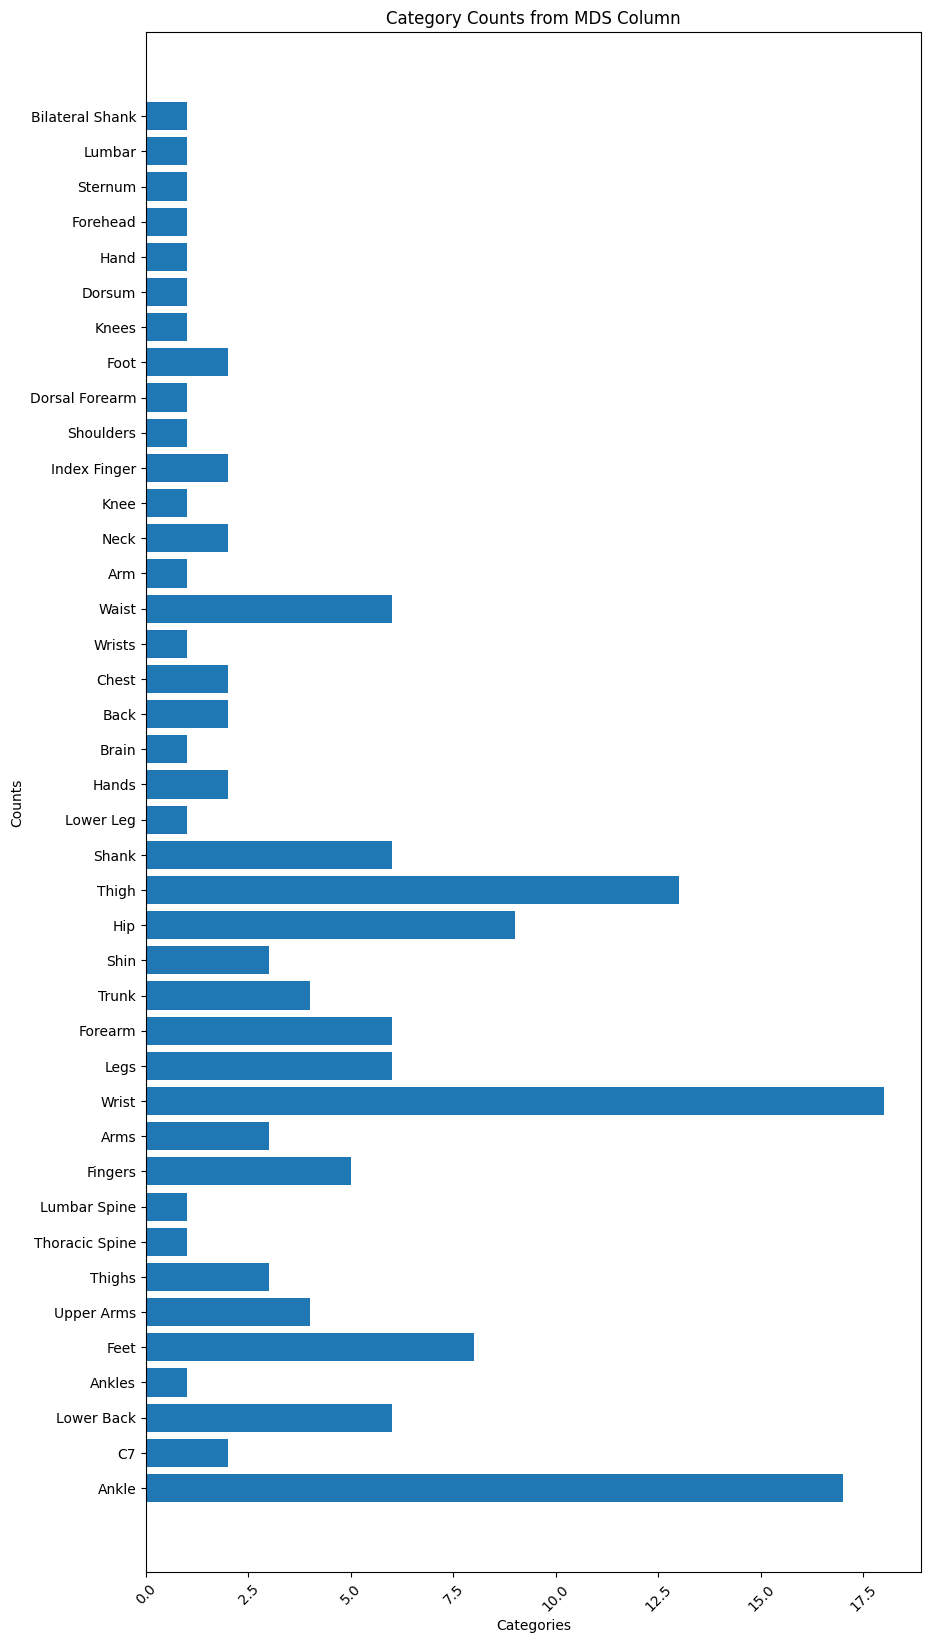

In [73]:
category_counts = GetCategoriesSum(temp_df, "Wearable Location",)
category_counts_series = pd.Series(category_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 20))
plt.barh(category_counts_series.index, category_counts_series.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Counts from MDS Column')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''
embedding_list = [        # High Dimensionality!
    embedded_authors,
    embedded_wearable_loc,
    embedded_tasks,
    embedded_datasets,
    embedded_papers,
    embedded_DSS,
    embedded_goals,
    embedded_abstracts,
    embedded_years,
    embedded_countries,
    embedded_algorithms,
    embedded_cv,
    embedded_pm,
    embedded_sample_size
]

combined_embeddings = np.concatenate(embedding_list, axis=1)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(combined_embeddings, n_refs=50, cluster_array=np.arange(1,10))


clustered_combined = CreateCluster(combined_embeddings, num_clusters)
PrintCluster(clustered_combined)
'''

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 225 and the array at index 1 has size 75

In [ ]:
'''
df["Combined_Text"] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df["Combined_Text"] = df["Combined_Text"].replace('nan', '')
embedded_text = EmbedFrame(df, "Combined_Text", model)

optimalKObj = OptimalK.OptimalK(n_jobs=4, parallel_backend='joblib')
num_clusters = optimalKObj(embedded_text, n_refs=50, cluster_array=np.arange(1,10))

clustered_text = CreateCluster(embedded_text, num_clusters)
PrintCluster(clustered_text)
'''